# AccelerateAI - Data Science Bootcamp

### Simple Linear Regression- Core Concepts :
- Scatter plot & Correlation 
- Data distribution
- Model training
- Model diagnostics
- Saving trained models 

### Case A. Finance - CAPM

### Objective -  Here we will attempt to build a model to predict stock prices based on a predictor variable, most likely the S&P 500 index

Steps :
1. Import specific libraries
2. Read the data into a dataframe

3. Data Cleaning and Preparation:
   - 3.1 Parse the date column and set it as the index for the data frame
   - 3.2 Visualize to represent the returns
   - 3.3 Fill any gaps in the stock prices values
   - 3.4 Create a new dataframe to deal with percentage changes in the stock prices rather than absolute values
   - 3.5 Drop the date column as it is already the index, and also would affect the upcoming visualizations
   
   
4. Visualizations to assess correlations and MLR Assumptions

   - 4.1 Build a heatmap to figure out the stocks which have correlation with the S&P Index
   - 4.2 KDE plot to check the data distribution
   - 4.3 Build a pairplot to visualize the potential linear relationship between the stocks and S&P   
  
      
5. Model building:
   - 5.1 Drop the na values
   - 5.2 Create a least squares function
   - 5.3 Select a stock based on the correlation analysis
   - 5.4 Use the function to evaluate the b0 and b1 estimators

In [14]:
#Step 1 : Import specific libraries

import numpy as np
import pandas as pd 

import seaborn as sbn 
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
import statsmodels.api as sm

In [15]:
#Step 2: Read the data into a dataframe
stocks_df = pd.read_csv('02_Stockprice.csv')
stocks_df.head()

,Date,AMZN,TSLA,GOOG,sp500
0,02-01-2015,308.519989,219.309998,523.373108,2058.199951
1,05-01-2015,302.190002,210.089996,512.463013,2020.579956
2,06-01-2015,295.290009,211.279999,500.585632,2002.609985
3,07-01-2015,298.420013,210.949997,499.727997,2025.900024
4,08-01-2015,300.459991,210.619995,501.303680,2062.139893


In [16]:
# Step3 : Data Cleaning and Preparation:

# 3.1 Parse the date column and set it as the index for the data frame

stocks_df['Date'] = pd.to_datetime(stocks_df['Date'], format="%d-%m-%Y")
stocks_df.set_index(stocks_df.Date, inplace=True)

In [17]:
stocks_df

,Date,AMZN,TSLA,GOOG,sp500
Date,,,,,
2015-01-02,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-05,2015-01-05,302.190002,210.089996,512.463013,2020.579956
2015-01-06,2015-01-06,295.290009,211.279999,500.585632,2002.609985
2015-01-07,2015-01-07,298.420013,210.949997,499.727997,2025.900024
2015-01-08,2015-01-08,300.459991,210.619995,501.303680,2062.139893
...,...,...,...,...,...
2020-08-05,2020-08-05,3205.030029,1485.020020,1473.609985,3327.770020
2020-08-06,2020-08-06,3225.000000,1489.579956,1500.099976,3349.159912
2020-08-07,2020-08-07,3167.459961,1452.709961,1494.489990,3351.280029


In [18]:
#3.2 Visualize to represent the returns
fig=px.line(stocks_df,x="Date",y=["AMZN", "TSLA", "GOOG"]) # Multiple columns can be plotted on the same graph, passing them as a list
fig.show()

In [7]:
# 3.3 Fill any gaps in the stock prices values

stocks_df = stocks_df.asfreq("D", method='ffill')
stocks_df.head(10)

,Date,AMZN,TSLA,GOOG,sp500
Date,,,,,
2015-01-02,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-03,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-04,2015-01-02,308.519989,219.309998,523.373108,2058.199951
2015-01-05,2015-01-05,302.190002,210.089996,512.463013,2020.579956
2015-01-06,2015-01-06,295.290009,211.279999,500.585632,2002.609985
2015-01-07,2015-01-07,298.420013,210.949997,499.727997,2025.900024
2015-01-08,2015-01-08,300.459991,210.619995,501.303680,2062.139893
2015-01-09,2015-01-09,296.929993,206.660004,494.811493,2044.810059
2015-01-10,2015-01-09,296.929993,206.660004,494.811493,2044.810059


In [19]:
# 3.4 Create a new dataframe to deal with percentage changes in the stock prices rather than absolute value

def pct_change (df): # This function takes in a dataframe as an argument
    change = (df - df.shift(1))/df
    return change

#3.5 Drop the date column as it is already the index, and also would affect the upcoming visualizations

dailyreturn_df = stocks_df.drop(columns="Date").apply(pct_change)
dailyreturn_df.head()

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973
2015-01-07,0.010489,-0.001564,-0.001716,0.011496
2015-01-08,0.006790,-0.001567,0.003143,0.017574


<AxesSubplot:>

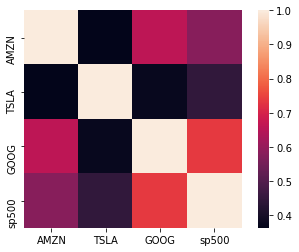

In [20]:
#Step 4: Visualizations to assess correlation between stock price changes and S&P 500 changes
   
    # 4.1 Build a heatmap to figure out the stocks which have correlation with the S&P Index

sbn.heatmap(data=dailyreturn_df.corr(),  # our correlation matrix
           square=True)

<AxesSubplot:ylabel='Density'>

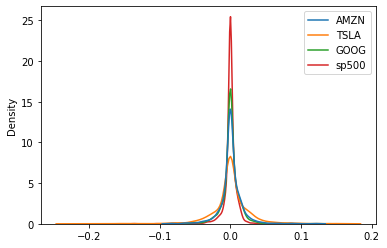

In [70]:
#4.2 KDE plot to check the data distribution

sbn.kdeplot(data=dailyreturn_df)

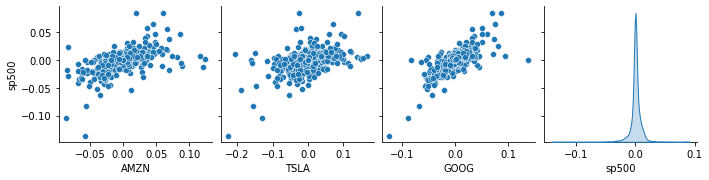

In [71]:
#Step 4.3 Build a pairplot to visualize the potential linear relationship between the stocks and S&P

sbn.pairplot(data = dailyreturn_df, 
             y_vars= 'sp500',
             diag_kind='kde')      

In [12]:
dailyreturn_df.head(5)

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-03,0.000000,0.000000,0.000000,0.000000
2015-01-04,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973


In [73]:
#Step 5 - Model building:

# 5.1 Drop the na and zero values

dailyreturn_df.drop([dailyreturn_df.index[1]], inplace=True)
dailyreturn_df.head(5)

,AMZN,TSLA,GOOG,sp500
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-04,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.020947,-0.043886,-0.021290,-0.018618
2015-01-06,-0.023367,0.005632,-0.023727,-0.008973
2015-01-07,0.010489,-0.001564,-0.001716,0.011496


In [10]:

filtered_df = dailyreturn_df.dropna()

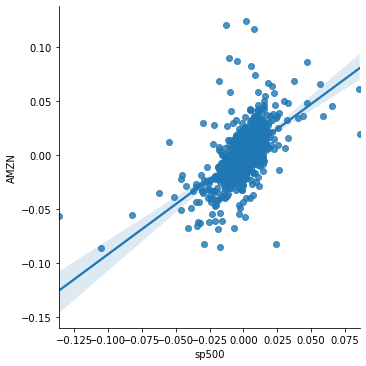

In [11]:
sbn.lmplot(data=filtered_df, x='sp500', y='AMZN')

In [22]:
#Step 5.2 Create a least squares function

def least_squares_fit(X, Y):
    """
    Given two vectors X and Y,
    find the least-squares values of b_0 and b_1
    """
    corr, _ = stats.pearsonr(X, Y)
    b_1 = corr*np.std(Y)/np.std(X)
    b_0 = np.mean(Y) - b_1*np.mean(X)
    return b_0, b_1

In [23]:
# Steps 5.3 and 5.4 : Select a stock based on the correlation analysis &  Use the function to evaluate the b0 and b1 estimators

#Choosing Amazon due to high correlation with S&P 500

alpha, beta = least_squares_fit(filtered_df['sp500'], filtered_df['AMZN'])
print('Beta for {} stock is = {} and alpha is = {}'.format('AMZN', round(beta,3), round(alpha,3)))  

Beta for AMZN stock is = 0.926 and alpha is = 0.001


In [78]:
# Expected market return
round(filtered_df["sp500"].mean()*252,3)

0.047

In [24]:
# Expected return for AMZN
round(filtered_df["AMZN"].mean()*252,3)

0.251

### Case B. HealthCare Studies   

##### Body fat data
The data contain estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.
Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.
The variables in the dataset consist of body measurements 
- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
etc

### Objective -  Here we will attempt to build a model to predict body fat percentages based on a predictor variable (the options include - age, weight, neck circumference etc.)

Steps :
1. Import specific libraries (already done)
2. Read the data into a dataframe

3. Data Cleaning and Preparation:
   - 3.1 Checking for null values and data types, both found ok
   
   
4. Visualizations to assess correlations, choosing the predictor variable, and checking SLR Assumptions

   - 4.1 Build a heatmap to figure out the correlations
   - 4.2 Direct correlation values using the corr method
   - 4.3 Build a pairplot to visualize the potential linear relationship
   - 4.4 Choosing the predictor variable based on visualizations and correlation analysis
   - 4.5 Visualize to check SLR assumptions - normality
   - 4.6 Visualize to check SLR assumptions - linear relationship between predictor and outcome
      
5. Model building:
   
   - Assigning X and Y 
   - Fitting the X and Y data into the regression model
   - Creating the OLS summary using the stats.ols function
   
6. Model Diagnostics
   - Residuals scatter plot
   - Q-Q Plot
   - Outlier identification
   
7. Model Updation and retraining
   - Dropping the outliers
   - Creating a new model from the updated dataframe

#### 2. Scatterplot & Correlation  

In [26]:
#Step 2 : Read the data into a dataframe

bodyfat_df = pd.read_csv("04_Bodyfat.csv")

In [27]:
bodyfat_df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [28]:
#Step 3 : Checking data quality:  Checking for null values and data types, both found ok

bodyfat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


<AxesSubplot:>

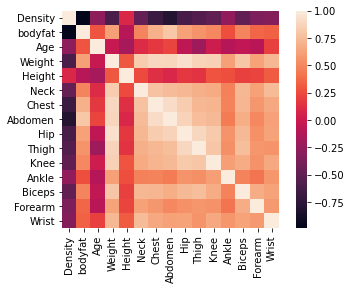

In [31]:
#Step 4. Visualizations to assess correlations and MLR Assumptions

   #4.1 Build a heatmap to figure out the correlations
    
sbn.heatmap(bodyfat_df.corr(), square = True)

In [33]:
#4.2 Direct correlation values using the corr method
bodyfat_df.corr().loc["bodyfat"]

Density   -0.987782
bodyfat    1.000000
Age        0.291458
Weight     0.612414
Height    -0.089495
Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: bodyfat, dtype: float64

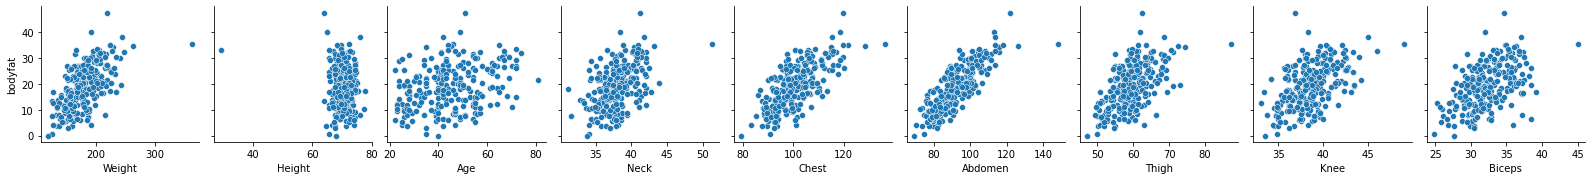

In [38]:
#4.3 Build a pairplot to visualize the potential linear relationship, features shortlisted based on correlation analysis

sbn.pairplot(bodyfat_df,     
             x_vars= ["Weight","Height", "Age","Neck", "Chest", "Abdomen", "Thigh", "Knee",  "Biceps"],
             y_vars= ["bodyfat"])

In [39]:
#4.3 Choosing the feature 'Abdomen', since it has the highest correlation, supported by the pairplot
df = bodyfat_df[['bodyfat', 'Abdomen']]
df.describe()

,bodyfat,Abdomen
count,252.000000,252.000000
mean,19.150794,92.555952
std,8.368740,10.783077
min,0.000000,69.400000
25%,12.475000,84.575000
50%,19.200000,90.950000
75%,25.300000,99.325000
max,47.500000,148.100000


<AxesSubplot:xlabel='bodyfat', ylabel='Density'>

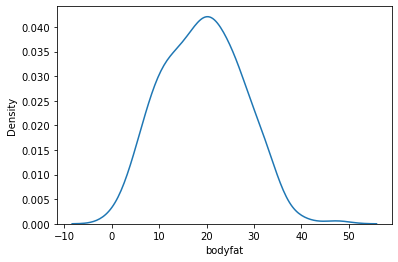

In [85]:
# 4. 
sbn.kdeplot(x=df.bodyfat)

<AxesSubplot:xlabel='Abdomen', ylabel='Density'>

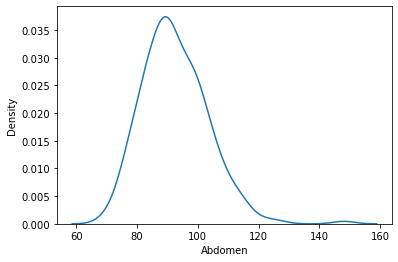

In [41]:
#5.1 Checking the distribution
sbn.kdeplot(x=df.Abdomen)

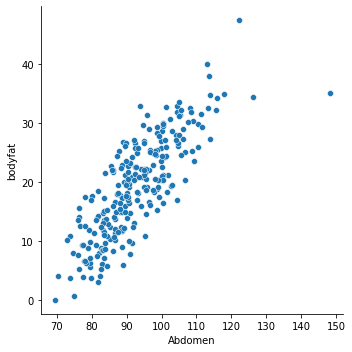

In [86]:
# How is the relationship between the age and bodyfat ? 
#4.6 Visualize to check SLR assumptions - linear relationship between predictor and outcome

sbn.relplot(data=df, x="Abdomen", y="bodyfat")

In [42]:
# Correlation 
df.corr()

,bodyfat,Abdomen
bodyfat,1.000000,0.813432
Abdomen,0.813432,1.000000


#### Step 5. Model Training 

In [44]:
#Step 5 : Model Building

# Triaining a linear regression model for bodyfat ~ Abdomen 

X = df.Abdomen
Y = df.bodyfat

X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()


print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     488.9
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           9.09e-61
Time:                        21:52:12   Log-Likelihood:                -755.90
No. Observations:                 252   AIC:                             1516.
Df Residuals:                     250   BIC:                             1523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.2802      2.660    -14.765      0.0

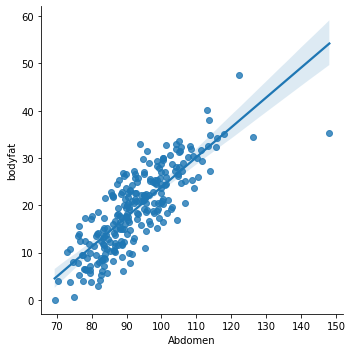

In [89]:
sbn.lmplot(data=df, x='Abdomen', y='bodyfat')
#plt.plot(df.Neck, 0.6313*df.Abdomen -39.2802

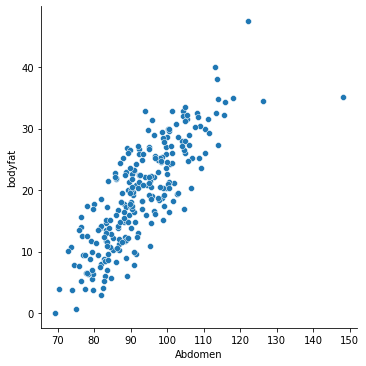

In [46]:
sbn.relplot(data=df, x='Abdomen', y='bodyfat')


#### 4. Model Diagnostics

In [48]:
residuals = reg_model.resid 
residuals.head()

0   -2.206949
1   -7.018079
2    9.088529
3   -4.864514
4    4.849746
dtype: float64

In [49]:
type(residuals)

pandas.core.series.Series

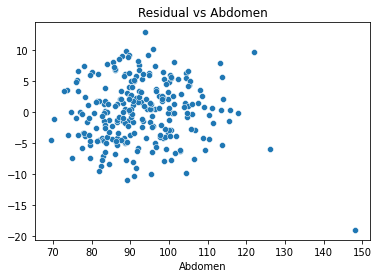

In [51]:
# Residual plot 
fig = sbn.scatterplot(x=df.Abdomen, y=residuals)
fig.set_title("Residual vs Abdomen")
plt.show()

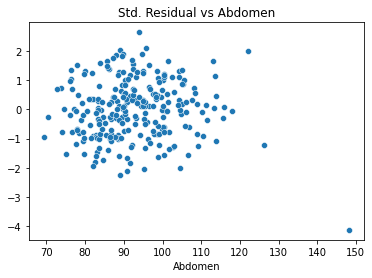

In [92]:
# Standardized residual plot 

#obtain standardized residuals
influence = reg_model.get_influence()
standardized_residuals = influence.resid_studentized_internal

fig = sbn.scatterplot(x=df.Abdomen, y=standardized_residuals)
fig.set_title("Std. Residual vs Abdomen")
plt.show()

D:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



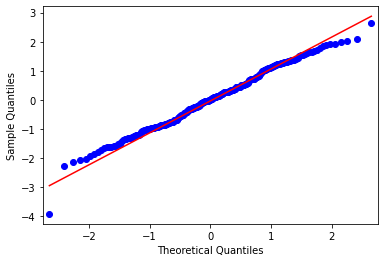

In [93]:
# Q-Q Plot
sm.qqplot(residuals, fit=True, line="q")
plt.show()

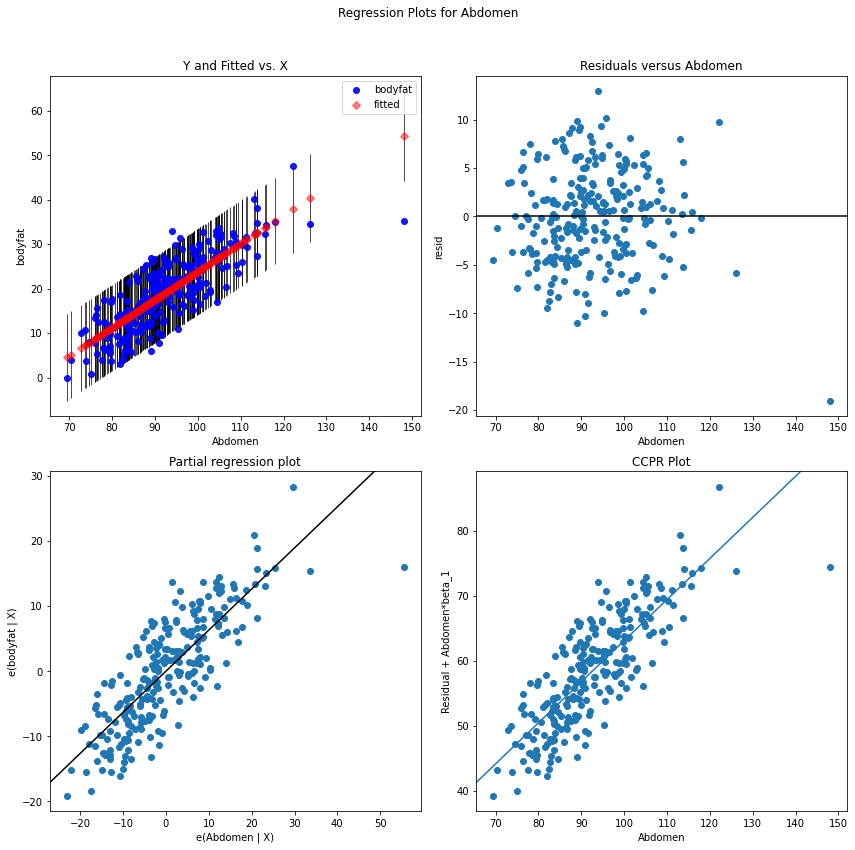

In [94]:
# Define figure size
fig = plt.figure(figsize=(12,12))

# Produce regression plots
fig = sm.graphics.plot_regress_exog(reg_model, 'Abdomen', fig=fig)

In [95]:
y_pred = reg_model.predict(X) 

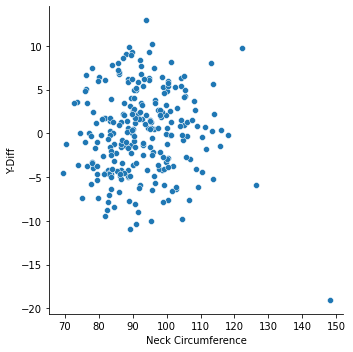

In [96]:
ax = sbn.relplot(x=df.Abdomen, y=Y-y_pred)
ax.set(xlabel='Neck Circumference', ylabel='Y-Diff')
plt.show()

In [97]:
# Prediction Interval 
pred_result = reg_model.get_prediction(X)
pred_ci = pred_result.conf_int(alpha=0.05)         # CI = (1-alpha)*100%
pred_ci[0:5]                        

array([[13.77395791, 15.23993945],
       [12.30880988, 13.9273482 ],
       [15.55213048, 16.87081054],
       [14.56737119, 15.96165669],
       [23.11445605, 24.58605102]])

In [98]:
# Outliers - calculate cook's distance and dffits 
infl = reg_model.get_influence()
sm_fr = infl.summary_frame()

In [99]:
sm_fr.sample(10)

,dfb_const,dfb_Abdomen,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
21,0.047382,-0.059656,7.018810e-03,-1.622497,0.005304,-0.118480,-1.627842,-0.118871
25,-0.124871,0.114562,1.110305e-02,-1.511097,0.009631,-0.149017,-1.515007,-0.149403
99,-0.000492,0.003713,3.910980e-04,0.439141,0.004040,0.027968,0.438431,0.027923
247,-0.030542,0.026978,8.920054e-04,-0.513644,0.006717,-0.042238,-0.512886,-0.042175
119,0.016150,-0.013034,4.712667e-04,0.440033,0.004844,0.030701,0.439323,0.030651
7,-0.026617,0.020479,1.687668e-03,-0.861055,0.004532,-0.058098,-0.860608,-0.058067
54,-0.113653,0.105585,8.445438e-03,-1.197978,0.011632,-0.129965,-1.199026,-0.130079
127,0.142145,-0.131775,1.335528e-02,1.533692,0.011228,0.163434,1.537873,0.163879
124,-0.000145,0.000128,2.139787e-08,-0.002574,0.006418,-0.000207,-0.002569,-0.000206
232,-0.006397,0.005028,8.671681e-05,-0.192706,0.004649,-0.013169,-0.192334,-0.013144


In [100]:
sm_fr.cooks_d.max()                  # Cook's distance greater than 1, are considered influential outliers 

1.0515810077469012

In [101]:
sm_fr.dffits.max()                   # DFFITS greater than {2*sqrt(p/n)} = 0.2 

0.38116050177849337

In [102]:
sm_fr[sm_fr['dffits'] > 0.2]

,dfb_const,dfb_Abdomen,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
35,-0.187619,0.201134,0.025599,1.651307,0.018430,0.226270,1.657063,0.227059
215,-0.340677,0.358141,0.071740,2.022862,0.033876,0.378787,2.035540,0.381161


In [103]:
df1= df.iloc[[35, 215], :]

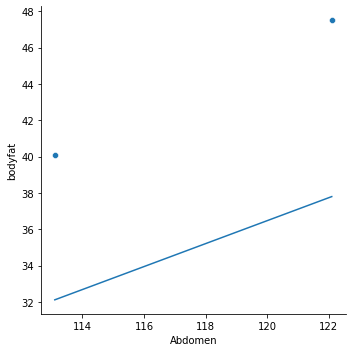

In [104]:
sbn.relplot(data=df1, y='bodyfat', x='Abdomen', )
plt.plot(df1.Abdomen, 0.6313*df1.Abdomen -39.2802)

In [105]:
# Lets drop these 2 point and retrain a linear regression model
updated_df = df.drop([df.index[35], df.index[215]])

In [106]:
X = updated_df.Abdomen
Y = updated_df.bodyfat

X = sm.add_constant(X)   # Adding the constant term

reg_model2 = sm.OLS(Y,X).fit()
print(reg_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     452.4
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           7.73e-58
Time:                        14:47:40   Log-Likelihood:                -747.35
No. Observations:                 250   AIC:                             1499.
Df Residuals:                     248   BIC:                             1506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.8470      2.688    -14.080      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



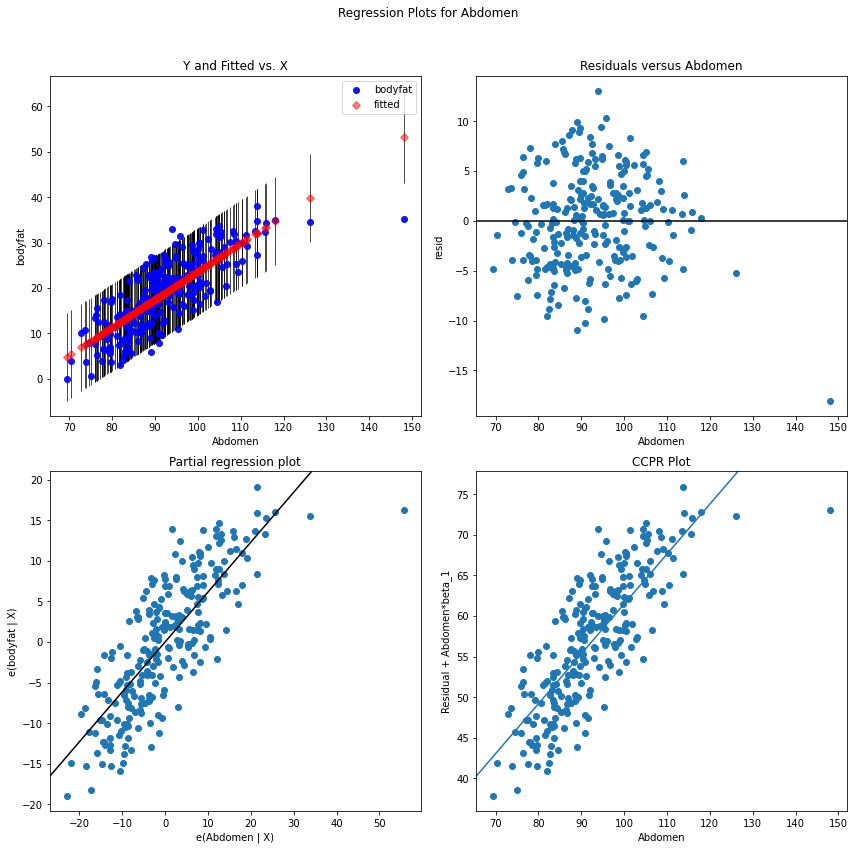

In [107]:
# Define figure size
fig = plt.figure(figsize=(12,12))

# Produce regression plots
fig = sm.graphics.plot_regress_exog(reg_model2, 'Abdomen', fig=fig)

#### 5.  Saving & Loading Models

In [108]:
# Saving a trained model
reg_model2.save("final_reg_model.pickle")

In [109]:
# Loading the saved model 
saved_model = sm.load("final_reg_model.pickle")

In [110]:
print(saved_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.644    
Dependent Variable: bodyfat          AIC:                1498.6912
Date:               2022-08-21 14:47 BIC:                1505.7341
No. Observations:   250              Log-Likelihood:     -747.35  
Df Model:           1                F-statistic:        452.4    
Df Residuals:       248              Prob (F-statistic): 7.73e-58 
R-squared:          0.646            Scale:              23.311   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const      -37.8470    2.6879  -14.0804  0.0000  -43.1411  -32.5529
Abdomen      0.6150    0.0289   21.2695  0.0000    0.5581    0.6720
------------------------------------------------------------------
Omnibus:              0.686         Durbin-Watson:           1.802
Prob(Omn